![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
#importing the packages I will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Exploring Aviation  accident  data

We start by exploring the data through typical data exploration method and attributes. We take a look at the first rows of data and the data types of columns.

In [2]:
# reading the csv file
avi_df = pd.read_csv("Data\AviationData.csv", encoding="latin1", low_memory=False )

# previewing the DataFrame
avi_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# List of data's columns
avi_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [4]:
# shape of the dataset
avi_df.shape

(88889, 31)

## Statistical Summary of the data set

In [5]:
avi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
avi_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [7]:
# Here you run your code to clean the data
avi_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [8]:
avi_df['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [9]:
#Finding the percentages of null columns
avi_df.isna().sum() / len(avi_df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [10]:
#Dropping irrelevant columns and columns with a higher percentage of null values
cols_to_drop = ['Accident.Number','Latitude', 'Longitude', 'Airport.Code', 'Airport.Name','Aircraft.Category',
                'FAR.Description', 'Schedule','Registration.Number', 
                'Air.carrier','Amateur.Built','Broad.phase.of.flight',
                'Publication.Date', 'Report.Status']
avi_df_clean = avi_df.drop(columns=cols_to_drop)

In [11]:
avi_df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

In [12]:
avi_df_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [13]:
avi_df_clean['Total.Fatal.Injuries'].value_counts()

0.0      59675
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
31.0         1
169.0        1
150.0        1
117.0        1
156.0        1
Name: Total.Fatal.Injuries, Length: 125, dtype: int64

In [14]:
avi_df_clean.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [15]:
# Renaming the columns to a consistent and conscise format
# Dictionary to rename old column names to new column names
column_rename = {
    "Event.Id": "event_id",
    "Investigation.Type": "investigation_type",
    "Event.Date": "event_date",
    "Location": "location",
    "Country": "country",
    "Injury.Severity": "injury_severity",
    "Aircraft.damage": "aircraft_damage",
    "Make": "make",
    "Model": "model",
    "Number.of.Engines": "number_of_engines",
    "Engine.Type": "engine_type",
    "Purpose.of.flight": "purpose_of_flight",
    "Total.Fatal.Injuries": "total_fatal_injuries",
    "Total.Serious.Injuries": "total_serious_injuries",
    "Total.Minor.Injuries": "total_minor_injuries",
    "Total.Uninjured": "total_uninjured",
    "Weather.Condition": "weather_condition"
}

# Renaming the columns
avi_df_clean.rename(columns=column_rename, inplace=True)

# Display the new column names
print(avi_df_clean.columns)


Index(['event_id', 'investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'make', 'model',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition'],
      dtype='object')


In [16]:
avi_df_clean.head()

,event_id,investigation_type,event_date,location,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


### Cleaning injury_severity and total_fatal_injuries columns

I realized that the values in parenthesis in injury_severity column are actually in the total_fatal_injuries column, which contains a lot of null values. Therefore I created a new column "totalfatal_injuries that contain the values from injury_severity column.

In [17]:
avi_df_clean.loc[:,["injury_severity", "total_fatal_injuries"]]

,injury_severity,total_fatal_injuries
0,Fatal(2),2.0
1,Fatal(4),4.0
2,Fatal(3),3.0
3,Fatal(2),2.0
4,Fatal(1),1.0
...,...,...
88884,Minor,0.0
88885,NaN,0.0
88886,Non-Fatal,0.0
88887,NaN,0.0


In [18]:
avi_df_clean["injury_severity"].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(143)        1
Fatal(37)         1
Fatal(56)         1
Fatal(141)        1
Fatal(138)        1
Name: injury_severity, Length: 109, dtype: int64

In [19]:
# Creating a new column
# Extracting numbers from the 'injury_severity' column using regex & Fill missing values in 'totalfatal_injuries' with 0 
avi_df_clean['totalfatal_injuries'] = avi_df_clean['injury_severity'].str.extract(r'\((\d+)\)').fillna(0).astype(int)

print(avi_df_clean['totalfatal_injuries'].head())


0    2
1    4
2    3
3    2
4    1
Name: totalfatal_injuries, dtype: int32


In [20]:
avi_df_clean.loc[:,["injury_severity", "totalfatal_injuries"]]

,injury_severity,totalfatal_injuries
0,Fatal(2),2
1,Fatal(4),4
2,Fatal(3),3
3,Fatal(2),2
4,Fatal(1),1
...,...,...
88884,Minor,0
88885,NaN,0
88886,Non-Fatal,0
88887,NaN,0


In [21]:
# Remove values in parentheses from 'injury_severity' to remain with unique values
avi_df_clean['injury_severity'] = avi_df_clean['injury_severity'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

# Displaying the updated DataFrame to verify
print(avi_df_clean['injury_severity'])


0            Fatal
1            Fatal
2            Fatal
3            Fatal
4            Fatal
           ...    
88884        Minor
88885          NaN
88886    Non-Fatal
88887          NaN
88888        Minor
Name: injury_severity, Length: 88889, dtype: object


In [22]:
avi_df_clean["injury_severity"].value_counts()

Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: injury_severity, dtype: int64

In [23]:
# Creating a new column to Categorize injury severity into broader groups
def categorize_severity(severity):
    if severity == 'Fatal':
        return 'Fatal'
    elif severity in ['Non-Fatal', 'Incident', 'Minor', 'Serious']:
        return 'Non-Fatal'
    else:
        return 'Unavailable'

avi_df_clean['severity_category'] = avi_df_clean['injury_severity'].apply(categorize_severity)


In [24]:
avi_df_clean['severity_category'].value_counts()

Non-Fatal      69967
Fatal          17826
Unavailable     1096
Name: severity_category, dtype: int64

In [25]:
avi_df_clean.isna().sum()

event_id                      0
investigation_type            0
event_date                    0
location                     52
country                     226
injury_severity            1000
aircraft_damage            3194
make                         63
model                        92
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
totalfatal_injuries           0
severity_category             0
dtype: int64

In [26]:
# Droping total_fatal_injuries col since I created a new column containing its values
avi_df_clean.drop(columns=['total_fatal_injuries'], inplace=True)

In [27]:
avi_df_clean.isna().sum()

event_id                      0
investigation_type            0
event_date                    0
location                     52
country                     226
injury_severity            1000
aircraft_damage            3194
make                         63
model                        92
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
totalfatal_injuries           0
severity_category             0
dtype: int64

In [28]:
# Checking the value counts in make column
avi_df_clean["make"].value_counts()

#It seems it contains both uppercased and lowercased values

Cessna                    22227
Piper                     12029
CESSNA                     4922
Beech                      4330
PIPER                      2841
                          ...  
Woodley                       1
MOORE BYRON J                 1
Corben Baby Ace               1
Chester                       1
NORTH AMERICAN/SCHWAMM        1
Name: make, Length: 8237, dtype: int64

In [29]:
# Convert the 'make' column to lowercase to improve our analysis
avi_df_clean['make'] = avi_df_clean['make'].str.capitalize()

avi_df_clean['make'].value_counts()


Cessna                 27149
Piper                  14870
Beech                   5372
Boeing                  2745
Bell                    2722
                       ...  
Charles raucci, jr.        1
Mitchell harvey            1
W.s. bowers, jr.           1
Hamlin john d              1
Prichard kevin             1
Name: make, Length: 7587, dtype: int64

In [30]:
# Checking for categorical columns 

avi_df_clean.dtypes

event_id                   object
investigation_type         object
event_date                 object
location                   object
country                    object
injury_severity            object
aircraft_damage            object
make                       object
model                      object
number_of_engines         float64
engine_type                object
purpose_of_flight          object
total_serious_injuries    float64
total_minor_injuries      float64
total_uninjured           float64
weather_condition          object
totalfatal_injuries         int32
severity_category          object
dtype: object

In [31]:
# Filling null values in categorical columns with the mode
categorical_columns = [ 'injury_severity', 'aircraft_damage',
                        'make', 'model', 'engine_type', 'purpose_of_flight', 'weather_condition']


# Filling null values in each categorical column with the mode
for column in categorical_columns:
    mode_value = avi_df_clean[column].mode()[0]  
    avi_df_clean[column].fillna(mode_value, inplace=True)

In [32]:
# Combining 'make' and 'model' into a single column for better analysis
avi_df_clean['make_model'] = avi_df_clean['make'] + " " + avi_df_clean['model']

In [33]:
#Dropping rows with null values in the remaining categorical columns
avi_df_clean = avi_df_clean.dropna(subset=['location', 'country'])

In [34]:
avi_df_clean.isna().sum()

event_id                      0
investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity               0
aircraft_damage               0
make                          0
model                         0
number_of_engines          6048
engine_type                   0
purpose_of_flight             0
total_serious_injuries    12482
total_minor_injuries      11904
total_uninjured            5892
weather_condition             0
totalfatal_injuries           0
severity_category             0
make_model                    0
dtype: int64

## Handling missing values numerical columns

In [35]:
# Finding the mean of number of engines
no_of_engines_mean = avi_df_clean['number_of_engines'].mean()
no_of_engines_mean = round(no_of_engines_mean, 0)
no_of_engines_mean

1.0

In [36]:
avi_df_clean['number_of_engines'].fillna(value = no_of_engines_mean, inplace=True )

In [37]:
# Convert the 'number_of_engines' column to integers
avi_df_clean['number_of_engines'] = avi_df_clean['number_of_engines'].astype(int)

# Verify the conversion
print(avi_df_clean['number_of_engines'].dtype) 


int32


In [38]:
avi_df_clean.isna().sum()

event_id                      0
investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity               0
aircraft_damage               0
make                          0
model                         0
number_of_engines             0
engine_type                   0
purpose_of_flight             0
total_serious_injuries    12482
total_minor_injuries      11904
total_uninjured            5892
weather_condition             0
totalfatal_injuries           0
severity_category             0
make_model                    0
dtype: int64

In [39]:
# Filling the remaining numerical columns with their various modes
avi_df_clean['total_serious_injuries'].fillna(avi_df_clean['total_serious_injuries'].median(), inplace=True)
avi_df_clean['total_minor_injuries'].fillna(avi_df_clean['total_minor_injuries'].median(), inplace=True)
avi_df_clean['total_uninjured'].fillna(avi_df_clean['total_uninjured'].median(), inplace=True)

In [40]:
# Now all the null values are dealt with
avi_df_clean.isna().sum()

event_id                  0
investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
totalfatal_injuries       0
severity_category         0
make_model                0
dtype: int64

In [41]:
# Converting the 'event_date' data type column from object to date
avi_df_clean['event_date'] = pd.to_datetime(avi_df_clean['event_date'])


In [42]:
# Check the data type of the 'event_date' column
print(avi_df_clean['event_date'].dtypes)


datetime64[ns]


In [43]:
# Creating a new column that contains only the years
avi_df_clean['year'] = avi_df_clean['event_date'].dt.year

## Exploratory Data Analysis

In [44]:
# Summary Statistics

avi_df_clean.describe()

,number_of_engines,total_serious_injuries,total_minor_injuries,total_uninjured,totalfatal_injuries,year
count,88612.000000,88612.000000,88612.000000,88612.000000,88612.000000,88612.000000
mean,1.135851,0.240148,0.308435,5.023631,0.398163,1999.230962
std,0.431395,1.435698,2.084987,26.939854,4.328312,11.893477
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,1998.000000
75%,1.000000,0.000000,0.000000,2.000000,0.000000,2009.000000
max,8.000000,161.000000,380.000000,699.000000,349.000000,2022.000000


In [45]:
avi_df_clean.describe(include='object')
                    

,event_id,investigation_type,location,country,injury_severity,aircraft_damage,make,model,engine_type,purpose_of_flight,weather_condition,severity_category,make_model
count,88612,88612,88612,88612,88612,88612,88612,88612,88612,88612,88612,88612,88612
unique,87678,2,27614,216,6,4,7582,12294,13,26,4,3,18482
top,20001212X19172,Accident,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,Cessna,152,Reciprocating,Personal,VMC,Non-Fatal,Cessna 152
freq,3,84770,434,82237,68195,67191,27161,2456,76474,55561,81564,69773,2410


## Trend Analysis 

Below is a bar graph showing the count of accidents over the years.

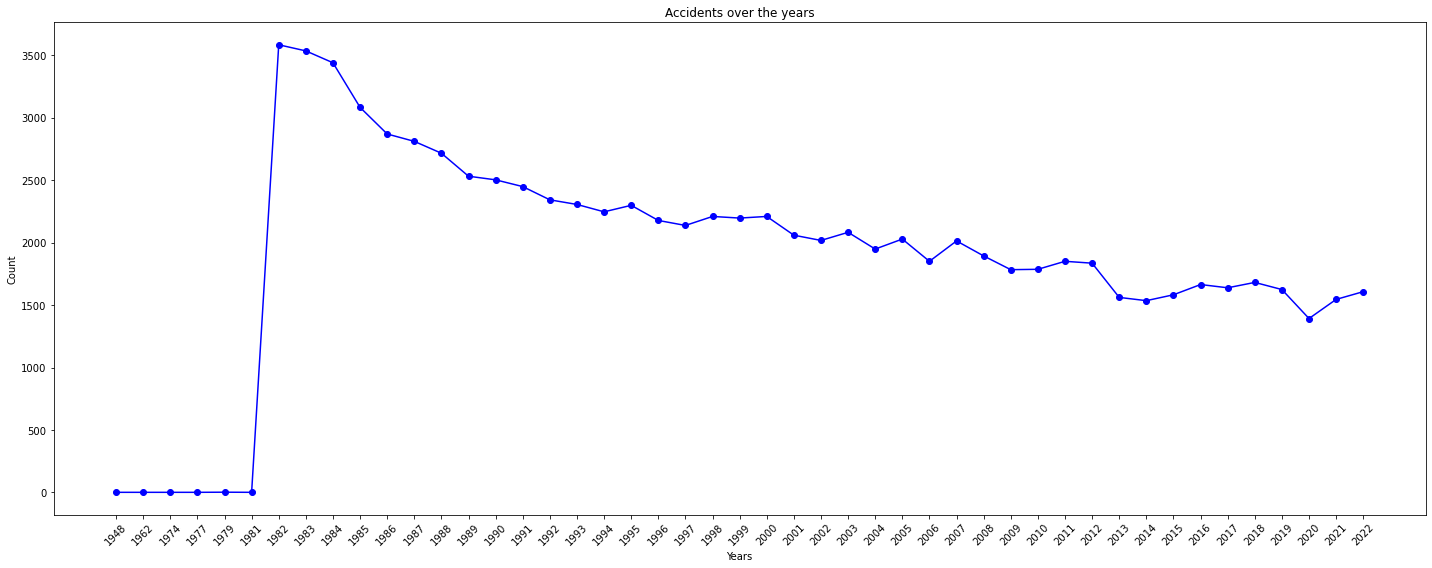

In [46]:
year_trend= avi_df_clean["year"].value_counts().sort_index()
x_= year_trend.index.astype(str)
y_ = year_trend.values

fig,ax = plt.subplots(figsize= (20,8))
ax.plot(x_, y_ ,marker="o", color='blue')
ax.set_xlabel('Years')
plt.xticks(x_, rotation=45)
ax.set_ylabel('Count')
ax.set_title('Accidents over the years')
plt.tight_layout() 
plt.show()

## Bar plot showing the count of total fatal and non-fatal injuries through out the years

In [47]:
# Grouping by year and severity category
severity_counts = avi_df_clean.groupby(['year', 'severity_category']).size().reset_index(name='count')
severity_counts.sort_values(by='count', ascending=False)

,year,severity_category,count
8,1982,Non-Fatal,2932
10,1983,Non-Fatal,2877
12,1984,Non-Fatal,2817
14,1985,Non-Fatal,2516
17,1986,Non-Fatal,2347
...,...,...,...
4,1979,Fatal,1
1,1962,Fatal,1
3,1977,Fatal,1
2,1974,Fatal,1


In [48]:
# Pivoting to easen plotting and for filling null values in the pivot table
severity_pivot = severity_counts.pivot(index='year', columns='severity_category', values='count').fillna(0)
severity_pivot 

severity_category,Fatal,Non-Fatal,Unavailable
year,,,
1948,1.0,0.0,0.0
1962,1.0,0.0,0.0
1974,1.0,0.0,0.0
1977,1.0,0.0,0.0
1979,1.0,1.0,0.0
1981,1.0,0.0,0.0
1982,651.0,2932.0,0.0
1983,657.0,2877.0,0.0
1984,622.0,2817.0,0.0


<Figure size 1080x576 with 0 Axes>

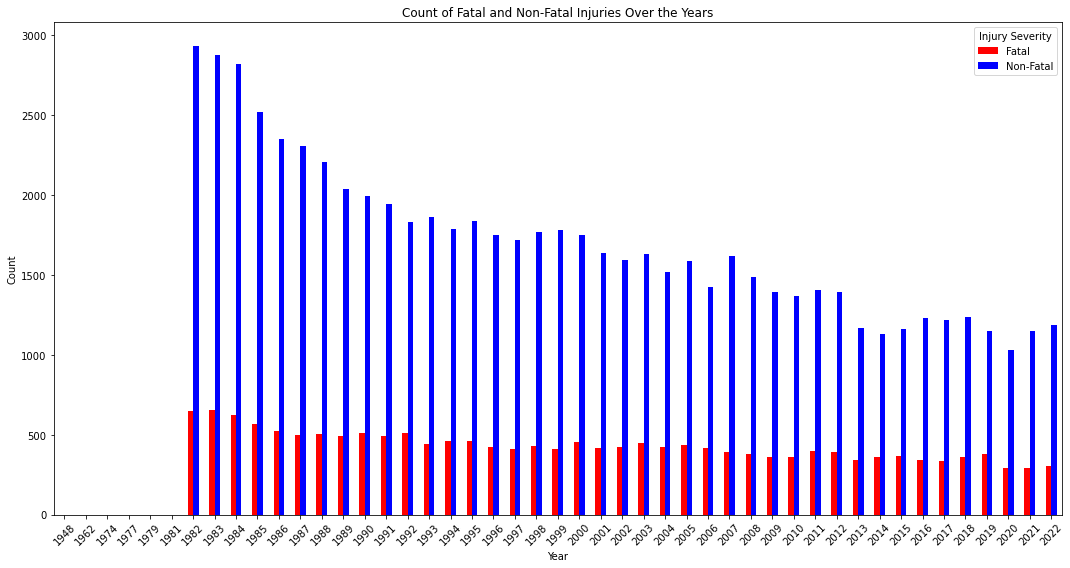

In [49]:
#Plotting

plt.figure(figsize=(15, 8))
severity_pivot[['Fatal', 'Non-Fatal']].plot(kind='bar', figsize=(15, 8), color=['red', 'blue'])

plt.title('Count of Fatal and Non-Fatal Injuries Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')

plt.tight_layout()
plt.show();

## 

## Bar plot showing the count of accidents by top 20 aircaft make

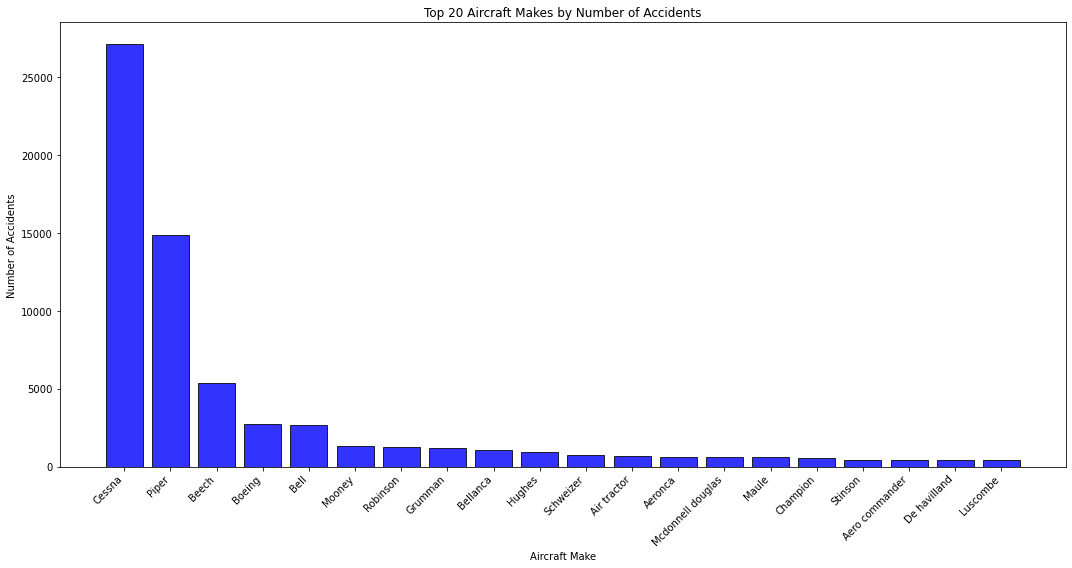

In [50]:

# Group by aircraft make and count the number of accidents
make_counts = avi_df_clean['make'].value_counts().head(20)

# Extracting labels
x_ = make_counts.index
y_ = make_counts.values

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x_, y_, color='blue', edgecolor='black', alpha=0.8)

# Customizing the plot
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Number of Accidents')
ax.set_title('Top 20 Aircraft Makes by Number of Accidents')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show();


In [51]:
make_counts

Cessna               27161
Piper                14840
Beech                 5359
Boeing                2725
Bell                  2650
Mooney                1331
Robinson              1224
Grumman               1169
Bellanca              1044
Hughes                 927
Schweizer              772
Air tractor            691
Aeronca                635
Mcdonnell douglas      605
Maule                  589
Champion               519
Stinson                439
Aero commander         427
De havilland           422
Luscombe               414
Name: make, dtype: int64

## Bar plot showing the count of accidents for the top 20 aircraft models

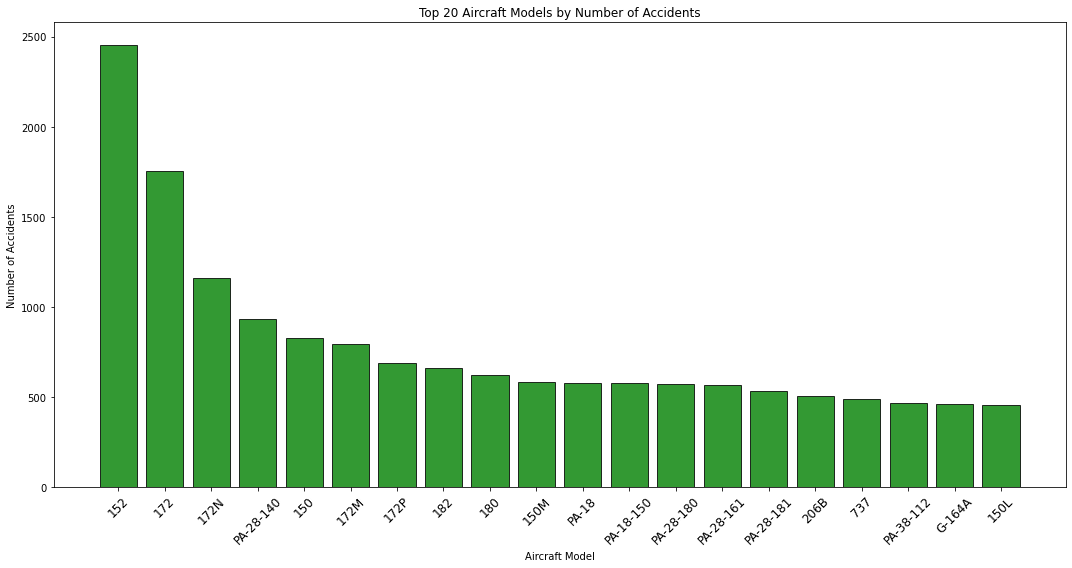

In [52]:
# Group by aircraft model and count the number of accidents
model_counts = avi_df_clean['model'].value_counts().head(20)

# Extracting labels
x_ = model_counts.index
y_ = model_counts.values

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x_, y_, color='green', edgecolor='black', alpha=0.8)

# Customizing the plot
ax.set_xlabel('Aircraft Model')
ax.set_ylabel('Number of Accidents')
ax.set_title('Top 20 Aircraft Models by Number of Accidents')
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.show()


##  Bar chart showing the top 20 aircraft make and model combinations with the highest number of accidents

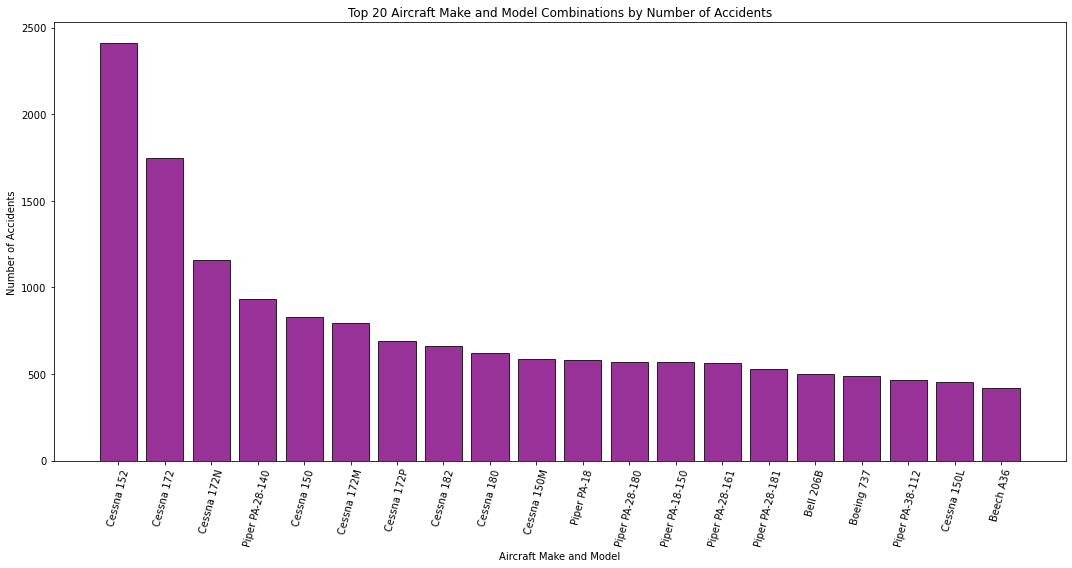

In [53]:
# Extracting the make_model and count the number of accidents
make_model_counts = avi_df_clean['make_model'].value_counts().head(20)

# Extracting labels
x_ = make_model_counts.index
y_ = make_model_counts.values

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x_, y_, color='purple', edgecolor='black', alpha=0.8)

# Customizing the plot
ax.set_xlabel('Aircraft Make and Model')
ax.set_ylabel('Number of Accidents')
ax.set_title('Top 20 Aircraft Make and Model Combinations by Number of Accidents')
plt.xticks(rotation=75)  # Rotating x-axis ticks for better readability

plt.tight_layout()
plt.show();


In [54]:
avi_df_clean['make'].value_counts()

Cessna                 27161
Piper                  14840
Beech                   5359
Boeing                  2725
Bell                    2650
                       ...  
Charles raucci, jr.        1
Mitchell harvey            1
W.s. bowers, jr.           1
Hamlin john d              1
Prichard kevin             1
Name: make, Length: 7582, dtype: int64

## Horizontal Bar graphs showing the accident count of 10 Common aircraft make grouped by model

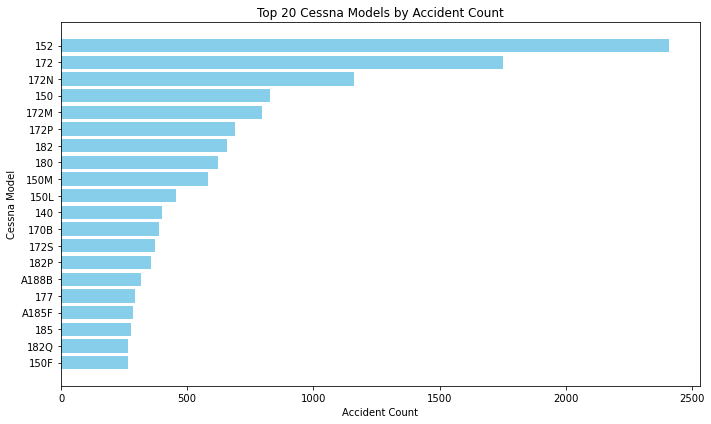

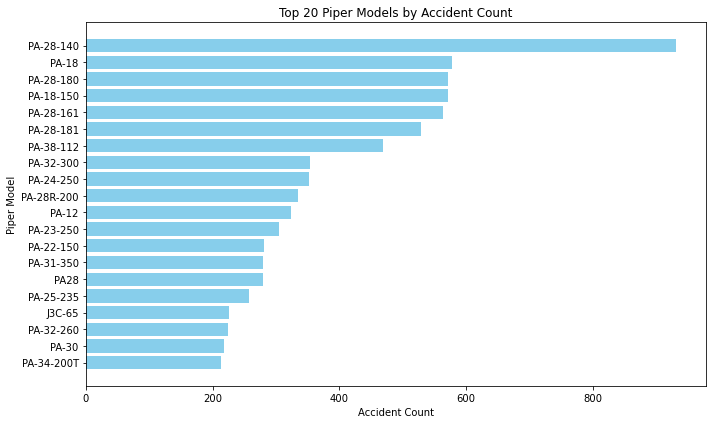

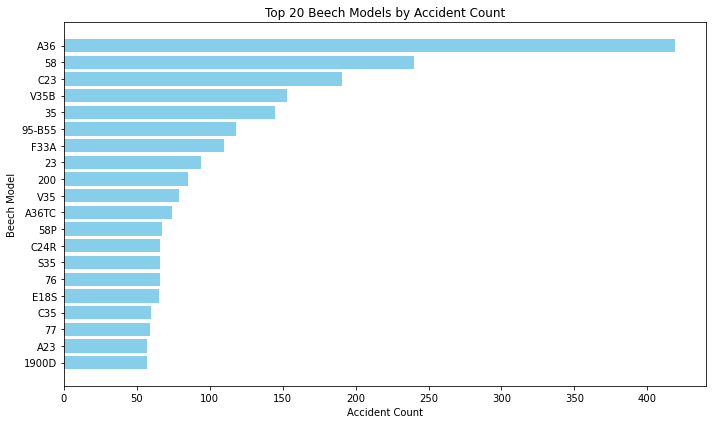

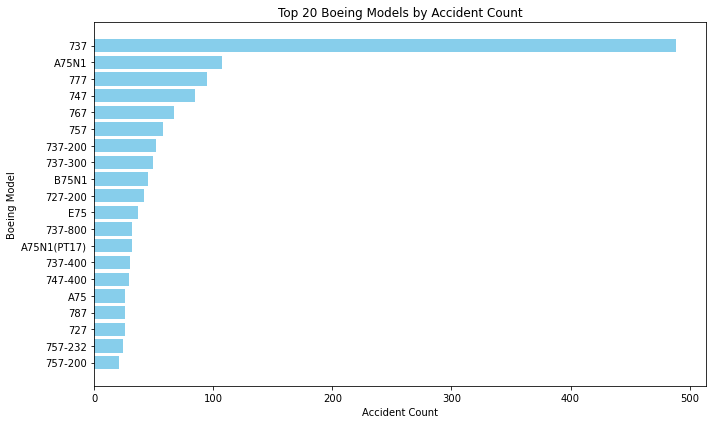

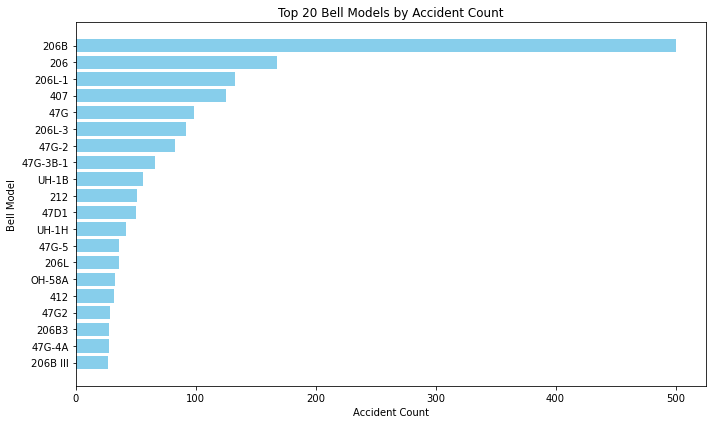

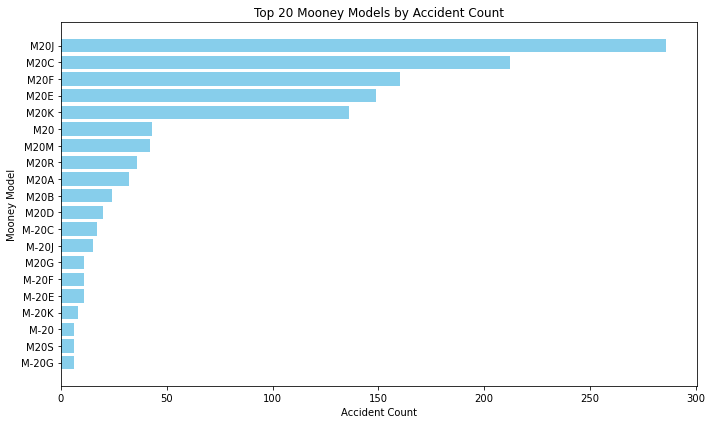

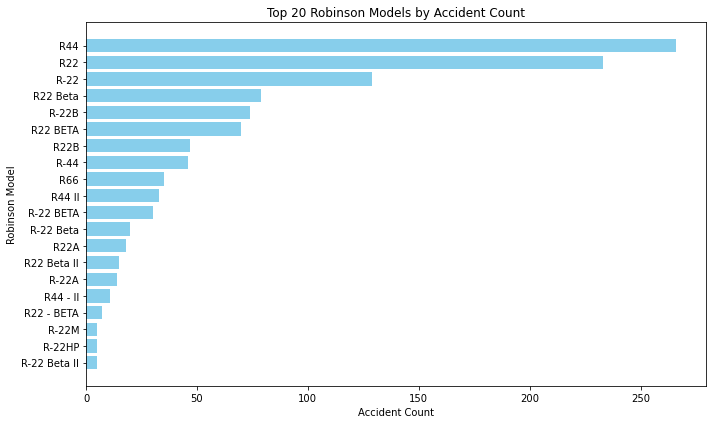

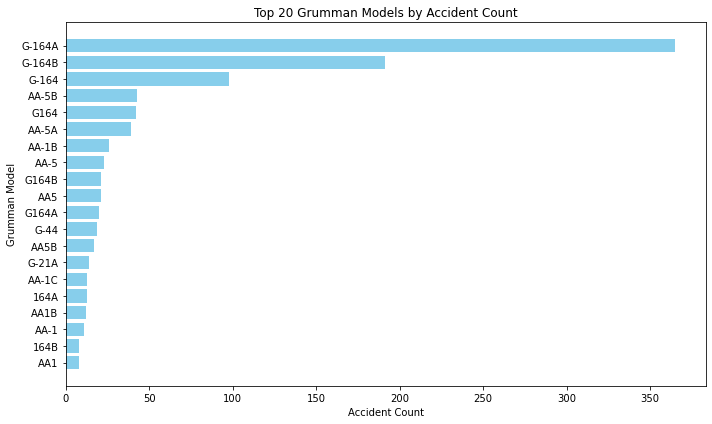

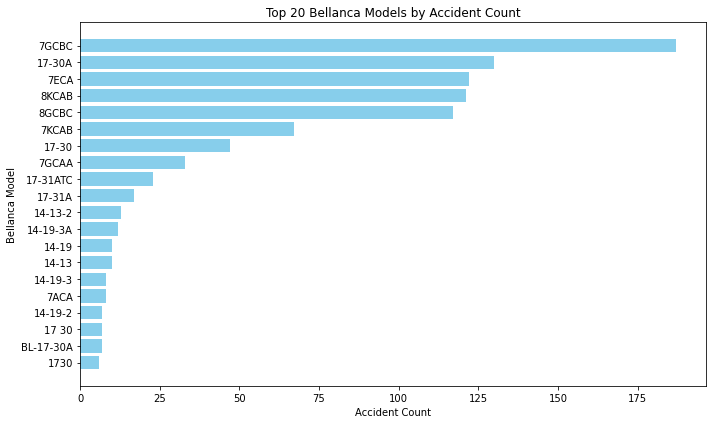

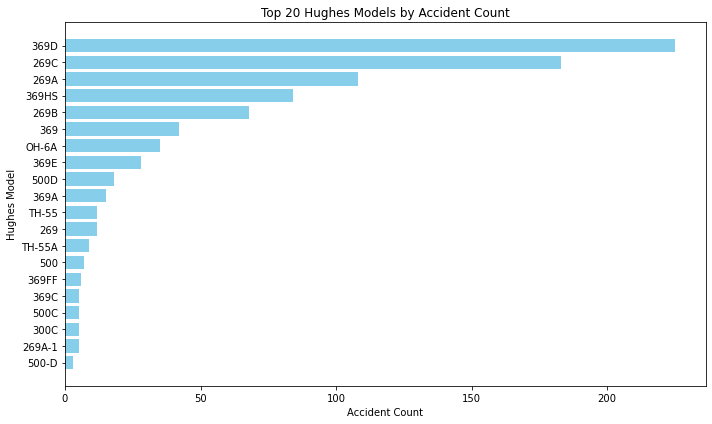

In [55]:
def plot_top_models_by_make(dataframe, make_name, top_n=20):
    """
    Plots a horizontal bar chart of the top models by accident count for a given make.
    
    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the aviation data.
        make_name (str): The name of the make to filter (e.g., 'Cessna').
        top_n (int): The number of top models to display in the chart.
    """
    # Filter rows for the specified make and group by model
    model_counts = (dataframe[dataframe['make'] == make_name]
                    .groupby(['model'])
                    .size()
                    .reset_index(name='accident_count'))
    
    # Sort by accident count in descending order and get the top N models
    top_models = model_counts.sort_values(by='accident_count', ascending=False).head(top_n)
    
    # Extract data for plotting
    models = top_models['model']
    accident_counts = top_models['accident_count']
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(models, accident_counts, color='skyblue')
    
    # Add titles and labels
    plt.title(f'Top {top_n} {make_name} Models by Accident Count')
    plt.xlabel('Accident Count')
    plt.ylabel(f'{make_name} Model')
    
    # Invert y-axis to show the model with the highest count at the top
    plt.gca().invert_yaxis()
    
    # Display the chart
    plt.tight_layout()
    plt.show()

# Example usage
makes = ['Cessna', 'Piper', 'Beech', 'Boeing', 'Bell', 'Mooney', 
         'Robinson', 'Grumman', 'Bellanca', 'Hughes']

for make in makes:
    plot_top_models_by_make(avi_df_clean, make_name=make, top_n=20)


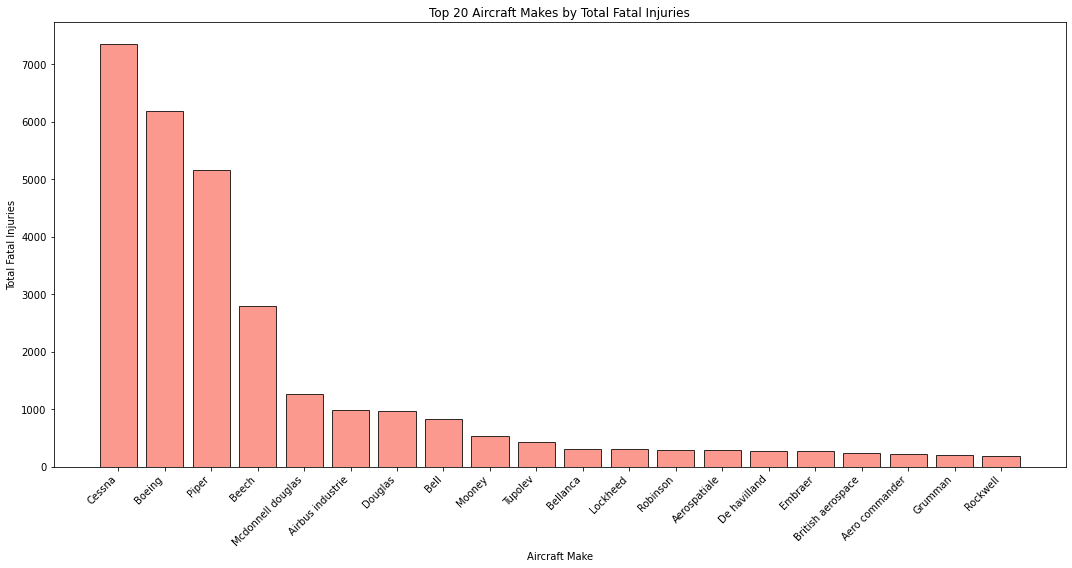

In [56]:
# Group by 'make' and sum the total fatal injuries
make_fatal_injuries = (avi_df_clean.groupby('make')['totalfatal_injuries']
                       .sum()
                       .sort_values(ascending=False)
                       .reset_index())

# Extract the top 20 makes with the highest total fatal injuries
top_20_makes_fatal = make_fatal_injuries.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_makes_fatal['make'], top_20_makes_fatal['totalfatal_injuries'],
        color='salmon', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Aircraft Makes by Total Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45,fontsize=10, ha='right')
plt.tight_layout()

# Display the plot
plt.show()



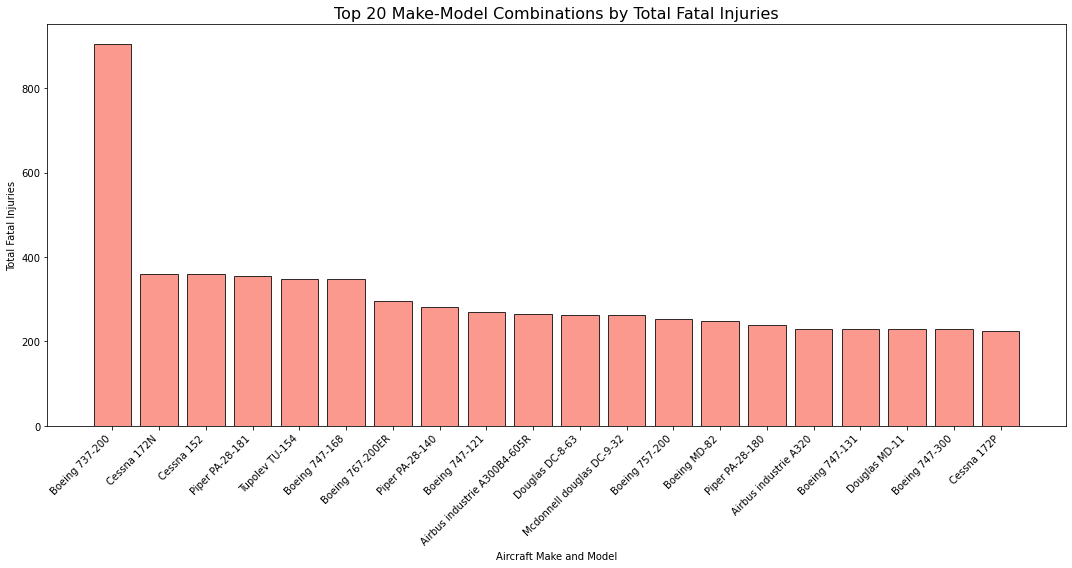

In [57]:
# Group by 'make_model' and sum the total fatal injuries
make_model_fatal_injuries = (avi_df_clean.groupby('make_model')['totalfatal_injuries']
                             .sum()
                             .sort_values(ascending=False)
                             .reset_index())

# Extract the top 20 make-model combinations with the highest total fatal injuries
top_20_make_model_fatal = make_model_fatal_injuries.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_make_model_fatal['make_model'], top_20_make_model_fatal['totalfatal_injuries'],
        color='salmon', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Make-Model Combinations by Total Fatal Injuries', fontsize=16)
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()




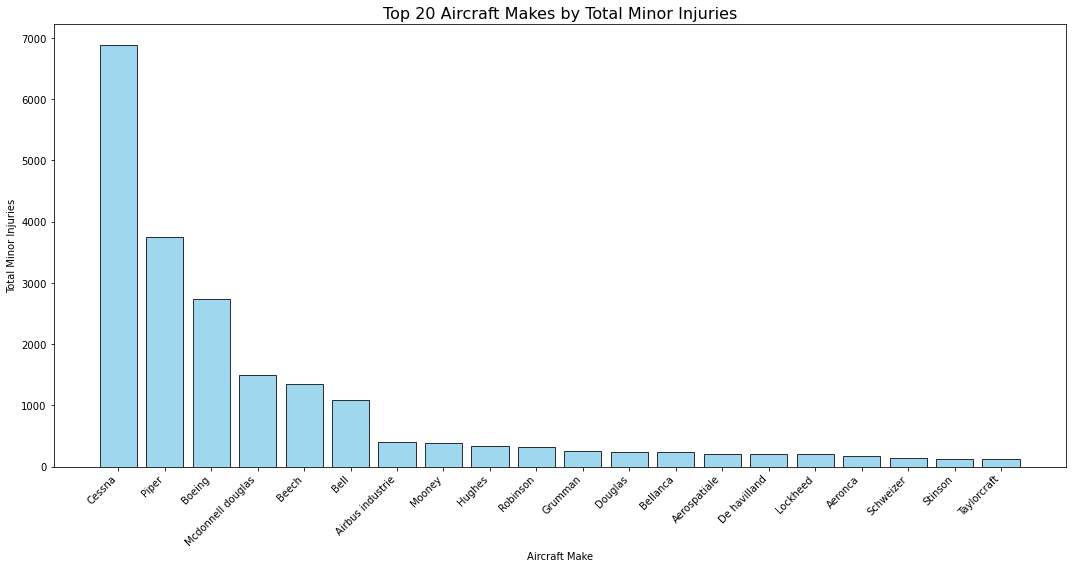

In [58]:
# Group by 'make' and sum the total minor injuries
make_minor_injuries = (avi_df_clean.groupby('make')['total_minor_injuries']
                       .sum()
                       .sort_values(ascending=False)
                       .reset_index())

# Extract the top 20 makes with the highest total minor injuries
top_20_makes_minor = make_minor_injuries.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_makes_minor['make'], top_20_makes_minor['total_minor_injuries'],
        color='skyblue', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Aircraft Makes by Total Minor Injuries', fontsize=16)
plt.xlabel('Aircraft Make')
plt.ylabel('Total Minor Injuries')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


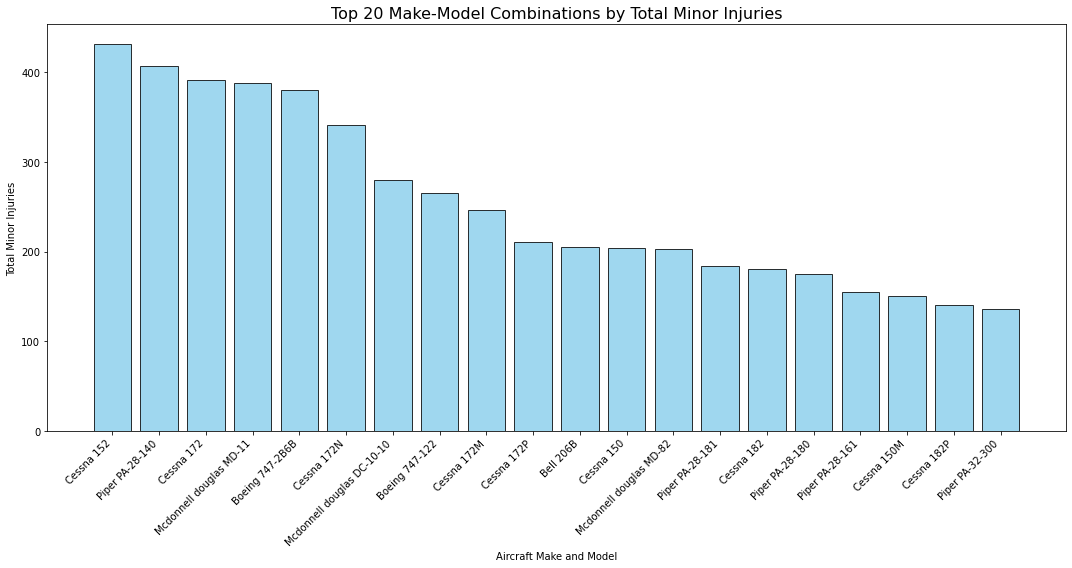

In [59]:
# Group by 'make_model' and sum the total minor injuries
make_model_minor_injuries = (avi_df_clean.groupby('make_model')['total_minor_injuries']
                             .sum()
                             .sort_values(ascending=False)
                             .reset_index())

# Extract the top 20 make-model combinations with the highest total minor injuries
top_20_make_model_minor = make_model_minor_injuries.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_make_model_minor['make_model'], top_20_make_model_minor['total_minor_injuries'],
        color='skyblue', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Make-Model Combinations by Total Minor Injuries', fontsize=16)
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Total Minor Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


## Top 20 total serious injuries by make

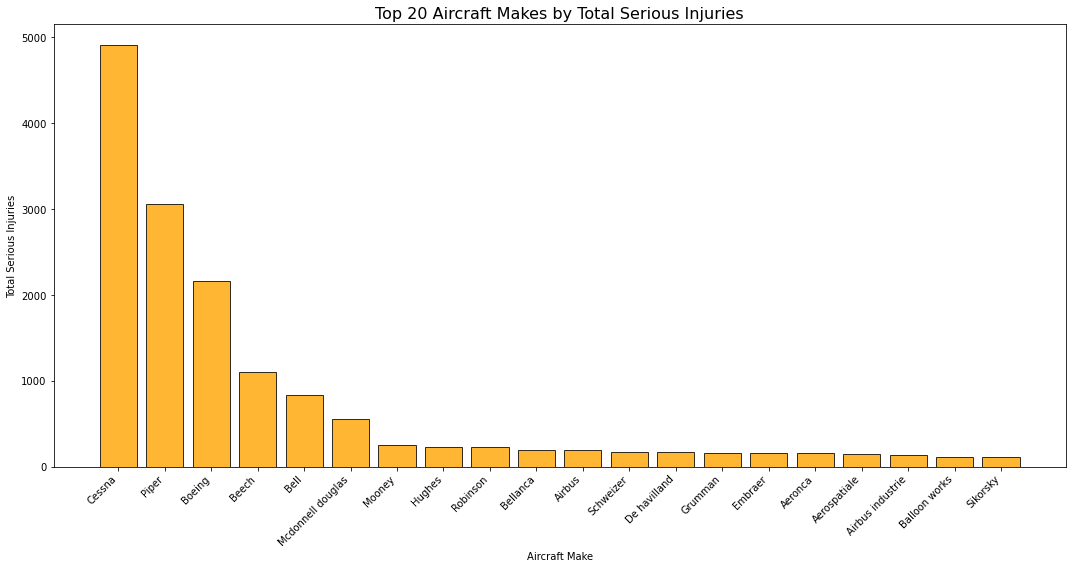

In [60]:
# Group by 'make' and sum the total serious injuries
make_serious_injuries = (avi_df_clean.groupby('make')['total_serious_injuries']
                         .sum()
                         .sort_values(ascending=False)
                         .reset_index())

# Extract the top 20 makes with the highest total serious injuries
top_20_makes_serious = make_serious_injuries.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_makes_serious['make'], top_20_makes_serious['total_serious_injuries'],
        color='orange', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Aircraft Makes by Total Serious Injuries', fontsize=16)
plt.xlabel('Aircraft Make')
plt.ylabel('Total Serious Injuries')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


## Top 20 total serious injuries by make and model

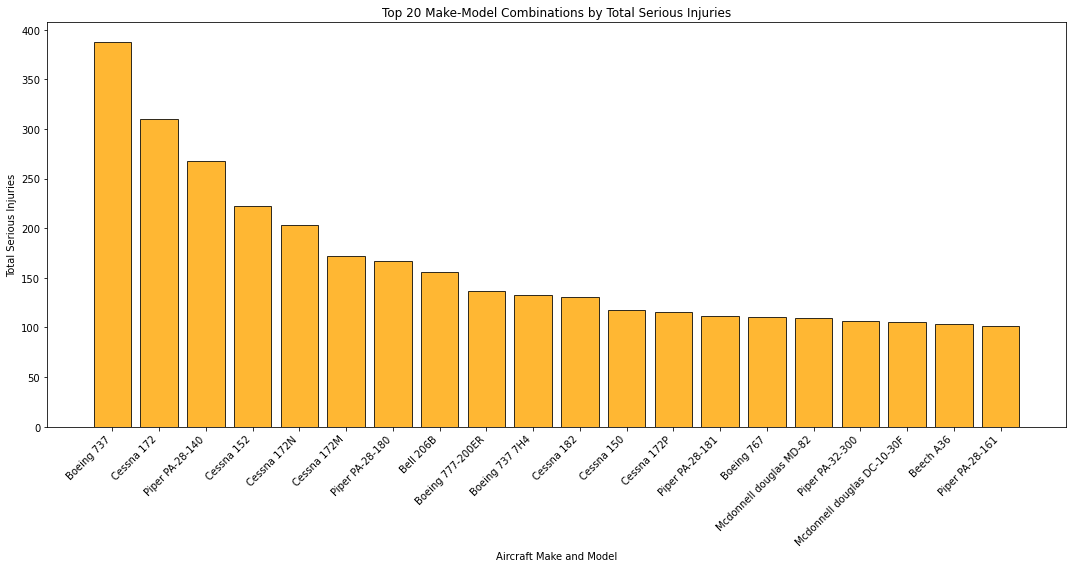

In [61]:
# Group by 'make_model' and sum the total serious injuries
make_model_serious_injuries = (avi_df_clean.groupby('make_model')['total_serious_injuries']
                               .sum()
                               .sort_values(ascending=False)
                               .reset_index())

# Extract the top 20 make-model combinations with the highest total serious injuries
top_20_make_model_serious = make_model_serious_injuries.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_make_model_serious['make_model'], top_20_make_model_serious['total_serious_injuries'],
        color='orange', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Make-Model Combinations by Total Serious Injuries')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Total Serious Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


##  Bar chart showing top 20 total uninjured by make

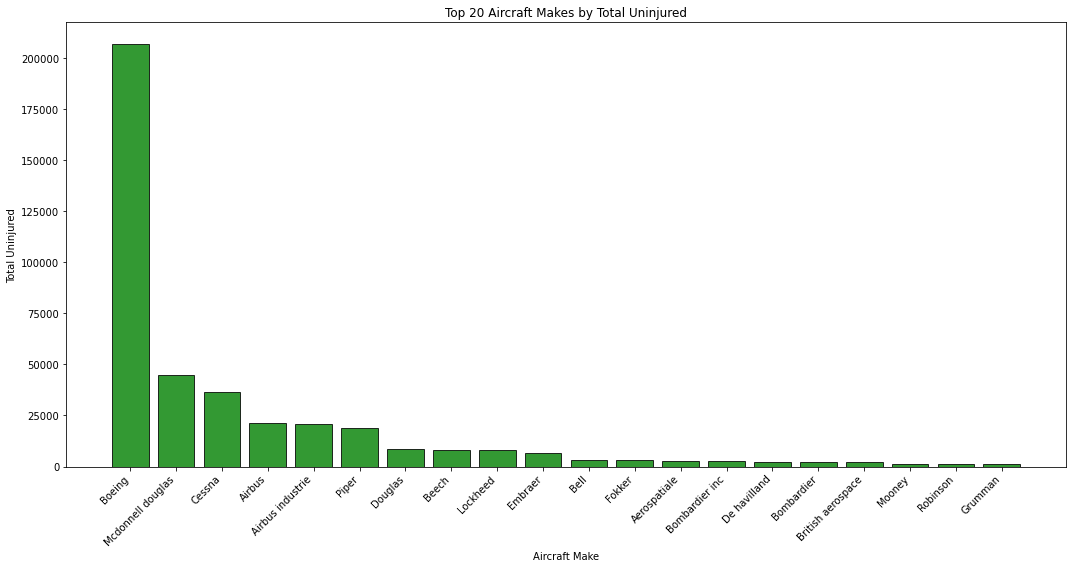

In [62]:
# Group by 'make' and sum the total uninjured
make_uninjured_counts = (avi_df_clean.groupby('make')['total_uninjured']
                         .sum()
                         .sort_values(ascending=False)
                         .reset_index())

# Extract the top 20 makes with the highest total uninjured
top_20_makes_uninjured = make_uninjured_counts.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_makes_uninjured['make'], top_20_makes_uninjured['total_uninjured'],
        color='green', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Aircraft Makes by Total Uninjured')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Uninjured')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

# Display the plot
plt.show()


##  Bar chart showing top 20 total uninjured by make & model

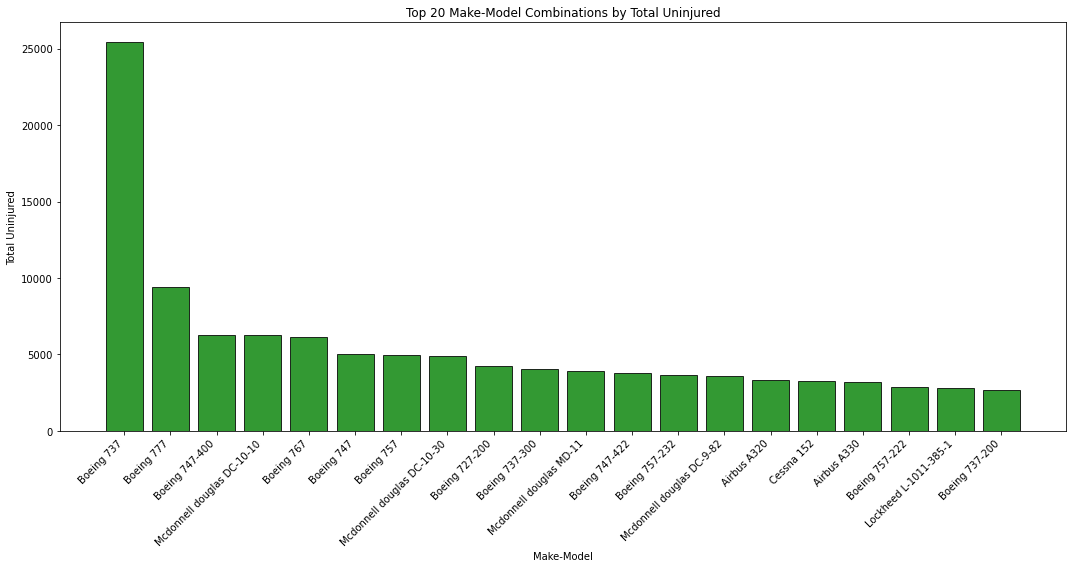

In [63]:
# Group by 'make_model' and sum the total uninjured
make_model_uninjured_counts = (avi_df_clean.groupby('make_model')['total_uninjured']
                               .sum()
                               .sort_values(ascending=False)
                               .reset_index())

# Extract the top 20 make-model combinations with the highest total uninjured
top_20_make_model_uninjured = make_model_uninjured_counts.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_make_model_uninjured['make_model'], top_20_make_model_uninjured['total_uninjured'],
        color='green', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Make-Model Combinations by Total Uninjured')
plt.xlabel('Make-Model')
plt.ylabel('Total Uninjured')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()




## Count of accidents grouped by engine type

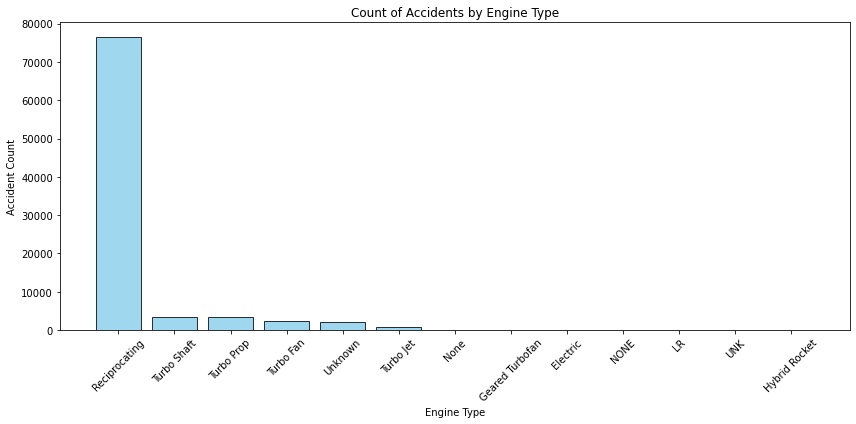

In [64]:
import matplotlib.pyplot as plt

# Group by 'engine_type' and count the number of accidents
engine_type_counts = avi_df_clean['engine_type'].value_counts()

# Sorting the values in descending order
engine_type_counts = engine_type_counts.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(engine_type_counts.index, engine_type_counts.values, color='skyblue', edgecolor='black', alpha=0.8)

# Adding titles and labels
plt.title('Count of Accidents by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)

# Adjust layout for better visibility
plt.tight_layout()

# Display the plot
plt.show()


## Bar chart showing the count of accidents grouped by number of engines:

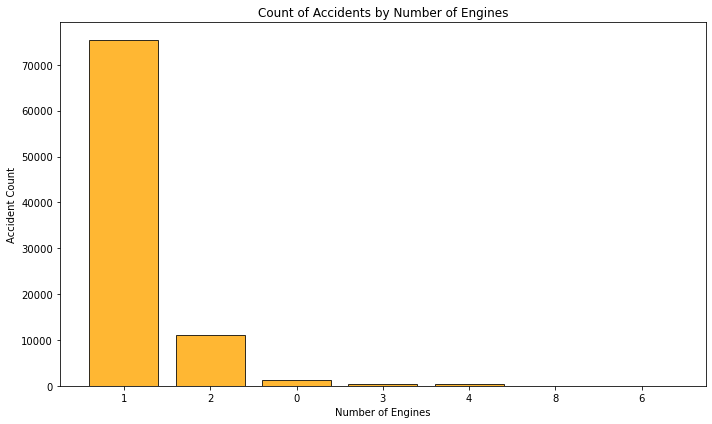

In [65]:
import matplotlib.pyplot as plt

# Group by 'number_of_engines' and count the number of accidents
engine_count_accidents = avi_df_clean['number_of_engines'].value_counts()

# Sorting the values in descending order
engine_count_accidents = engine_count_accidents.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(engine_count_accidents.index.astype(str), engine_count_accidents.values, color='orange', edgecolor='black', alpha=0.8)

# Adding titles and labels
plt.title('Count of Accidents by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Accident Count')
plt.xticks(rotation=0)

# Adjust layout for better visibility
plt.tight_layout()

# Display the plot
plt.show()


## Bar charts showing the accident counts by make & model engine type

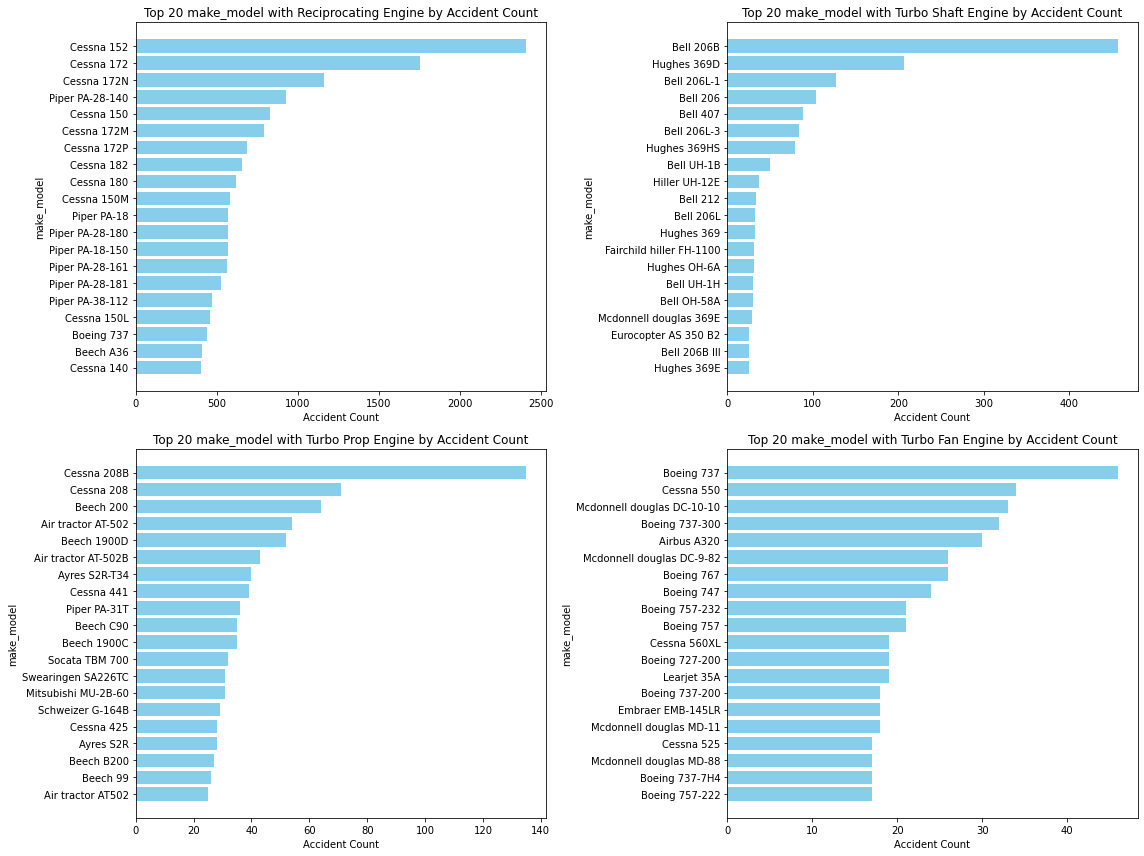

In [66]:
import matplotlib.pyplot as plt

# List of engine types we are interested in
engine_types = ['Reciprocating', 'Turbo Shaft', 'Turbo Prop', 'Turbo Fan']

# Create a figure with multiple subplots (one for each engine type)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each engine type and plot the top 20 make_model combinations
for i, engine_type in enumerate(engine_types):
    # Filter rows based on the engine type
    engine_df = avi_df_clean[avi_df_clean['engine_type'] == engine_type]
    
    # Group by make_model and count the number of accidents
    make_model_engine_count = engine_df.groupby('make_model').size().reset_index(name='accident_count')
    
    # Sort by accident count in descending order and get the top 20 make_model combinations
    top_20_engine_make_model = make_model_engine_count.sort_values(by='accident_count', ascending=False).head(20)
    
    # Plotting the bar chart for the current engine type
    axes[i].barh(top_20_engine_make_model['make_model'], top_20_engine_make_model['accident_count'], color='skyblue')
    axes[i].set_title(f'Top 20 make_model with {engine_type} Engine by Accident Count')
    axes[i].set_xlabel('Accident Count')
    axes[i].set_ylabel('make_model')
    axes[i].invert_yaxis()  # Invert y-axis to show the make_model with the highest count at the top

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


# Bar charts showing the accident counts by make & model number of engines

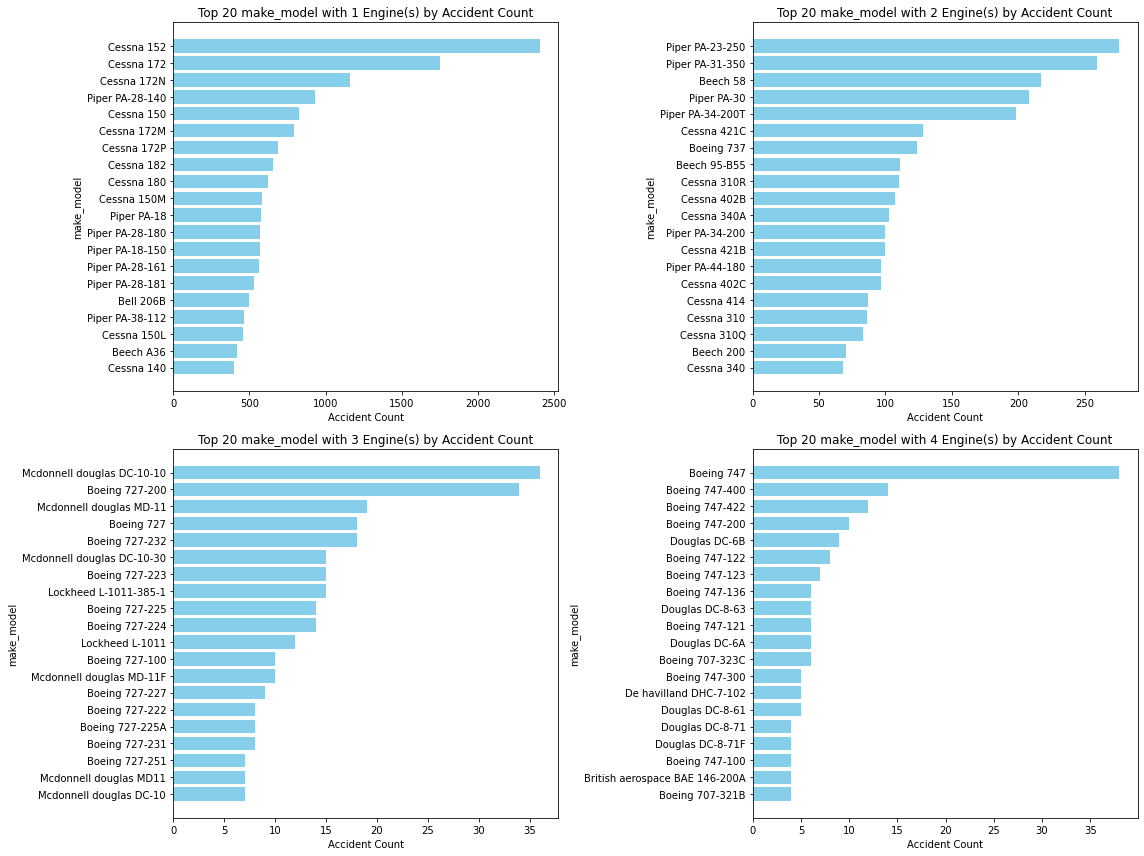

In [67]:
import matplotlib.pyplot as plt

# List of engine counts we are interested in
engine_counts = [1, 2, 3, 4]

# Create a figure with multiple subplots (one for each engine count)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each engine count and plot the top 20 make_model combinations
for i, engine_count in enumerate(engine_counts):
    # Filter rows based on the number of engines
    engine_df = avi_df_clean[avi_df_clean['number_of_engines'] == engine_count]
    
    # Group by make_model and count the number of accidents
    make_model_engine_count = engine_df.groupby('make_model').size().reset_index(name='accident_count')
    
    # Sort by accident count in descending order and get the top 20 make_model combinations
    top_20_engine_make_model = make_model_engine_count.sort_values(by='accident_count', ascending=False).head(20)
    
    # Plotting the bar chart for the current engine count
    axes[i].barh(top_20_engine_make_model['make_model'], top_20_engine_make_model['accident_count'], color='skyblue')
    axes[i].set_title(f'Top 20 make_model with {engine_count} Engine(s) by Accident Count')
    axes[i].set_xlabel('Accident Count')
    axes[i].set_ylabel('make_model')
    axes[i].invert_yaxis()  # Invert y-axis to show the make_model with the highest count at the top

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Bar charts showing top ten make, models with their respective accident counts

In [68]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***